## Passwords

I am someone who for a long time made minor variations to the same password each time i needed to create or change a password. In an effort to improve my password hygiene, I created a small python module that establishes a framework for creating methods that can be used for generating random strings.

A password should meet the following criteria

- it should meet the requirements of the platform that requires a password (which more and more often requires a minimum certain length, requires capital letters, and requires numbers)
- it should be memorable to the user (so it should include phrases that can be easily remembered)
- it should be strong against [dictionary-style password attacks](https://en.wikipedia.org/wiki/Dictionary_attack) (it should include defects in words)

### Example Methods

Within this module I have prepared two methods that generate random strings:

- `generate_password` - generates camel-case passwords with phrases from movie reviews with a single character defect and an integer tail
- `uuid4` - generates a uuid according [this specification](https://en.wikipedia.org/wiki/Universally_unique_identifier), version 4

Since this module creates a framework within which to design methods for generating random strings, the `uuid4` method is a good example of a different type of random string that can be generated using the frameword created for paswords.

In [1]:
import sys
sys.path.append('../')

from passwords import generate_password, uuid4

Here are some example passwords generated by the `generate_password` method:

In [2]:
for i in range(10):
    print(generate_password())

SometimusEvenTheMost45
AndTheresReallyNat32
AndLuckily#isParents48
With%oChoiceAvailable73
OneHighlyOr!ginalElement21
IveNoticedSomething7ately75
AndDi$coversTheresA82
GoodAndBadVibrateons19
HesDaughterMyrtlePlummer53
OneWouldntThinkTh@t91


Here are some example uuid's generated from the `uuid4` method

In [3]:
for i in range(10):
    print(uuid4())

020b47b7-99cc-4221-950d-89b15fe63a53
2247ddee-2328-4e8a-a84c-b65849e90638
ea1a8ce7-6f90-4b04-82e7-c38455bf80df
1fd2f083-d981-48b7-9294-e629eb3180ff
ed1b6f03-1f8c-4446-be06-a8e6fe9e46c5
1b681755-eda3-45c9-90db-c7a1d415a565
bcb12a77-5dc1-4775-9f3a-3dd4a380eef0
336ace9c-4e1d-454a-b4eb-deec7d68e000
1c4b25b5-e7c1-4213-a2f1-1c6dd82df49e
e47c9565-05e5-4f1e-be96-b5a347efd716


### Framework for Creating Random String Generators

This framework is based on a series of customizable objects which have a class method `generate` which produces a string output given a seed string input. By using function composition, we can create a pipeline of series of methods that can generate, append to, and modify random strings.

Some of these objects include:
- `Constant` - appends a constant to a seed string
- `Case` - modifies the case of the seed string
- `RandomString` - appends a random string of fixed length where each character is selected from a uniform distribution across a sepecified list of characters
- `Surround` - surrounds an input seed string with specified strings
- `AlphaDefect` - inserts a specified number of defects into a seed string
- `Integers` - inherits from `RandomString`, creates a random string of integers
- `CorpusPhrase` - extracts a random phrase of specified length from an `nltk` corpus of works

Then, objects such as these can be strung together using pipeline objects such as:
- `Password` - has a `generate` method which performs function composition on the `generate` methods for a list of input objects
- `Switch` - has a `generate` method which randomly selects one of the input objects and uses the generate method from that object.

In [4]:
from passwords.constructor import Password, Switch, Case, Constant,\
                                  Surround, CorpusPhrase, TextPhrase,\
                                  RandomString, Integers, AlphaDefects
                                  
from nltk.corpus import nps_chat, brown, shakespeare, gutenberg

For the purpose of password generation, the most important component is obtaining a phrase from a text that may be memorable. For example, if we would like to extract a random phrase from a shakespeare text with 3-5 words, we can instantiate a `CorpusPhrase` object wrapped around `nltk.corpus.shakespeare`, which can then generate random phrases:

In [5]:
cp = CorpusPhrase(shakespeare, n_min=2, n_max=4)
cp.generate()

u'gobbo marry god forbid'

Then we can insert this object within a pipeline to specify a complex set of rules for generating a password. 

For example, we can create a password that:

- is generated from a 2-4 word long shakespeare phrase
- is either snake-case or camel-case
- surrounds the phrase with some symbols

Here is the instantiation of that:

In [6]:
pw = Password([
        CorpusPhrase(shakespeare, n_min=2, n_max=4),
        Switch([
             Case("snake_case"),
             Case("camel_case"),
        ]),
        Switch([
             Surround('(', ')'),
             Surround('*'),
             Surround('__'),
             Surround('^', '$'),
        ]),
     ])

for i in range(10):
    print(pw.generate())

__was_he_not_born__
*thou_art_if_thou*
*IKnowABank*
__quince_well_we_will__
__flourish_malcolm_we_shall__
^ReEnterPuckAnd$
^a_heath$
(BrutusAndAfterThat)
__TheMostYouSought__
*brutus_into_what_dangers*


I have also included a simple ascii tree representation of the structure of the password generator objects in the \__repr__ method which indicates child objects in the tree structure with indentation. Note that the children of the `Password` objects or ordered, but the children of the `Switch` objects are unordered.

In [7]:
print(pw)

<Password>
	<CorpusPhrase: n=[2, 4], shakespeare>
	<Switch>
		<SnakeCase>
		<CamelCase>
	<Switch>
		<Surround: ( ... )>
		<Surround: * ... *>
		<Surround: __ ... __>
		<Surround: ^ ... $>


Here is another object which generates passwords from alice in wonderland with a vowel defect and a random integer and symbol at the end.

In [8]:
alice_in_wonderland = ' '.join(
                      gutenberg.words('carroll-alice.txt')
                      )

pw = Password([
           TextPhrase(alice_in_wonderland, n_min=2, n_max=4),
           Case('camel_case'),
           AlphaDefects(n=1,
                       replace_vowels=True,
                       respect_vowels=True,
                       force_change=True),
           Integers(n=1),
           RandomString(1, "!?."),
     ])

print(pw)

<Password>
	<TextPhrase: n=[2, 4], "[ Alice ' s Adventures in...">
	<CamelCase>
	<AlphaDefects: n=[1, 1], {'vowels': 'vowels'}>
	<Integers: n=1>
	<RandomString: n=1, !?.>


In [9]:
for i in range(10):
    print(pw.generate())

IThinkICoald4.
DoYouThenkI1?
ItOsntSaidThe6?
AboutOnceInU6!
ItMeansMuchTho6!
UmSureImNot5.
IfterAWhileShe2?
IfIDontTaku1!
WhenSoddenlyThump1?
WhereIreYou6!


## Assessment of Password Generators

Given a password generator, we might want to determine an estimate as to the number of passwords that can be generated using that method. This provides an estimate of the entropy of the distribution of passwords that can be generated. In other words - how long it would take a computer to crack your password by trying every password that can be generated using your password generator, if someone had found-out which password generator you were using.

We may be able to evaluate from first principles how many passwords can be generated from a given method given the structure of the password generating object. However, this may also be computationally difficult because we would have to identify every possible phrase that could have been generated and identify how many defects could have been generated in each phrase, etc... Given that these password generators can become quite complex, this is probably not a very good approach to the problem.

A better approach is to sample from the distribution of passwords under the (probably reasonable) assumtion that each password is equally likely, and look for "collisions" - passwords that are generated multiple times. The more "collisions" that we observe after taking a fixed number of samples from the distribution, the fewer passwords we would infer can be generated from the distribution.

Lets draw $N=25000$ passwords from the default password generating distribution (I selected this number of passwords to since to generate that number of passwords takes about a  minute - about as long as I am willing to wait for this code to run):

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", font_scale=1.3)
import pandas as pd
import numpy as np
from scipy.special import factorial
from IPython.display import Markdown, display
from time import time

N = 25000

In [11]:
t0 = time()

passwords = pd.DataFrame(
    [(generate_password(),) 
      for i in range(N)],
    columns=["password"]
)

T = time() - t0
print("%.2f min" % (T/60,))

1.16 min


I have stuck the passwords into a dataframe, which can easily perform an aggregation by password counting the number of entries ordered by the number of counts in descending order.

In [12]:
aggregate = passwords.password.value_counts()
aggregate.head(10)

TheSameChar@cterThe01             2
ISeemToHa^e22                     2
UndIsntThatThe43                  2
Dee9BlueSeaDoes68                 2
HowDoTheyCime25                   2
H0weverThatDoesntNecessarily73    1
InShartTheAntithesis71            1
4nywayTheCrewGets64               1
FromTheWreterDirector23           1
KrippendorfsTrubeDoesSeem81       1
Name: password, dtype: int64

Here, we see that out of 25000 draws, that some passwords have collided, but there are very few. The collision rate is given by:

In [16]:
distribution = aggregate.value_counts()

collision_rate = (distribution[distribution.index > 1].sum()/float(distribution.sum()))

collision_rate

0.00020004000800160032

In the limit that the collision rate is very small compared to one (the limit in which we are currently working), we expect that the number of underlying passwords in the distribution would be roughly given by the number of samples taken divided by the collision rate:

In [17]:
display(Markdown(
    """
**Expected unique number of passwords**: $\\langle n \\rangle \\sim 10^{%.1f}$
""" % (np.log10(N/collision_rate),)
))


**Expected unique number of passwords**: $\langle n \rangle \sim 10^{8.1}$


Thats more than 100 million passwords, which given that the time $T$ required to extract $N$ passwords, would require a running time of about:

In [18]:
print("running time = %.1f days" % ((T/collision_rate)/(3600 * 24),))

running time = 4.0 days


This running time is not outside of the realm of possibility, and could be completed much more quickly if the code were optimized for speed and were run in parallel. Hence, I do not recommend exclusively using the default password generator, but rather creating a password generating object of your own. 

## The Occupancy Problem

We were able to make a crude estimate of the number of passwords that could be generated with a given method in the previous section. By doing a little bit of statistics we can evaluate a posterior probability distribution for the number of passwords (under the assumption that each password is equally to be generated) given the distribution of number of times each password was observed.


### The Statistics

This problem falls within the class of "occupancy problems". Given that we draw $N$ samples from a password generating object with $n$ passwords, we can map this problem onto an occupancy problem win which we have $n$ urns in which we will randomly place $N$ balls, and we would like to determine the probability that we will observe a certain distribution of number of balls in these urns.

If we define $c_i$ as the number of balls in urn of index $i$, then this probability of observing the particular distribution that we do is given by the multinomial distribution:

$$P = \frac{N!}{\prod_{i=1}^n c_i!}  \frac{1}{n^N}$$

However, I don't care about the particular distribution of $c_i$. For example if I have $N=2$ balls and $n=2$ urns the different possible $c_i$ distributions are:

|$c_1$|$c_2$|
|-|-|
|0|2|
|1|1|
|2|0|

I don't want to distinguish between observing collisions in urn $i=1$ versus collisions in urn $i=2$. Hence, I will instead want to measure the probability of observing a given *unordered* distribution of balls in urns, which will will require us to count the number of ordererings possible for a given unordered distribution of balls in urns.

Given that I observe a distribution such that there are $m_j$ urns with $j$ balls in them, then this probability is:
$$P = \frac{N!}{\prod_{i=1}^n c_i!}  \frac{1}{n^N}\prod_{j=0}\binom{n - \sum_{k=0}^j m_k}{m_j}.$$

This probability distribution for the observed distribution of balls in urns (or in our case the number of times I observe a given password), serves as the likelihood $P(\{c_i\}|n)$ that I would observe a distribution $\{c_i\}$ given that there are $n$ passwords. Hence we can infer a probability distribution for the $n$ using Bayes theorem,

$$ P(n|\{c_i\}) = P(\{c_i\}|n)P(n)/P(\{c_i\})$$

where $P(n)$ is our prior distribution for $n$ and $P(\{c_i\})$ is a normalization constant.

### The Computation

We would like to compute this posterior distribution, but there is one significant computational difficulty - if we attempt straight-forward computations with the formulas above, we will be evaluating factorials for very large integers which could quickly fill the entire memory of your computer with long integers.

There are two reasonable approaches therefore for evaluating the posterior distribution:
1. perform the numerical computation with stirling's approximation to the log of the factorial.
2. evaluate an analytic normal approximation to the likelihood distribution.

#### 1. Numerical Computation

Stirlings approximation to the factorial function is the first term in an asymptotic expansion to the Gamma function, which is a continuous function that is equivalent to the factorial function for positive integers. This approximation is:

$$n!\approx \sqrt{2\pi n}\left(\frac{n}{e}\right)^n $$

Here i define the log of the factorial function, binomial function, and multinomial function which will use the factorial function below a selected threshold and the stirlings approximation above that input threshold.

In [19]:
def s_log_f(n, threshold=25):
    "stirlings approximation to log(factorial(n)) when n > threshold"
    if n < threshold:
        return np.log(factorial(n))
    else:
        return (n * np.log(n) - n + np.log(2 * np.pi * n) / 2)

def s_log_binomial(n, k, threshold=25):
    "stirlings approximation to log(binomial(n, k))"
    return (  s_log_f(n, threshold=threshold) 
            - s_log_f(k, threshold=threshold) 
            - s_log_f(n - k, threshold=threshold))

def s_log_multinomial(array, threshold=25):
    "stirlings approximation to the log of the multinomial coefficient"
    return (  s_log_f(sum(array), threshold=threshold) 
            - sum([s_log_f(i, threshold=threshold) for i in array]))

Then using these elementary functions, I can evaluate the log of the likelihood function given an input distribution of numbers of observations for each password observed, and a hypothesis for the number of passwords $n$.

In [20]:
def log_P(distribution, n, threshold=25):
    """
    the log-likelihood for observing a distribution of number of
    times observing each password that was observed *distribution*
    given that there are *n* passwords that can be generated.
    """
    
    # obtain the distribution of number of passwords
    # which were observed a certain number of times
    # (specified as $m$ above)
    m_s = distribution.value_counts()
    
    if n - m_s.sum() < 0:
        # the number of passwords must be bigger or equal
        # to the number of passwords observed
        return - np.inf
    
    m_s[0] = n - m_s.sum()
    m_s.sort_index(inplace=True)
    
    # need the cumulative m_s for the re-ordering binomial factor:
    cumulative_m_s = np.cumsum([0] + list(m_s))
    
    # number of samples
    N = sum(distribution)
    
    return (
     s_log_multinomial(distribution, threshold=threshold) - 
     N * np.log(n) + 
     sum([
        s_log_binomial(n - m_cum, m, threshold=threshold) 
        for m, m_cum in zip(m_s, cumulative_m_s)
    ]))

In [21]:
def P_posterior(n_s, distribution,
                prior=None,
                normalize=True,
                threshold=25):
    
    n_s = np.array(n_s)
    
    if prior is None:
        # if prior is not given, assume uniform over input array of n
        prior = np.ones(shape=len(n_s))
    
    log_likelihood = np.array([log_P(distribution, n,
                                     threshold=threshold) 
                               for n in n_s])
        
    log_posterior = log_likelihood + np.log(prior)
    
    # shift the log_posterior closer to zero before exponentiation
    log_posterior = log_posterior - np.max(log_posterior)
    
    p = np.exp(log_posterior)
    
    if not normalize:
        return p
    
    # estimate the areas of the intervals represented by each point
    diff = n_s[1:] - n_s[:-1]
    diff = np.array([diff[0]] + list((diff[:-1] + diff[1:])/2) + [diff[-1]])
    
    p = p * diff
    return p / np.sum(p)

def get_quantiles(alpha_s, n_s, p_s):
    cdf = np.cumsum(p_s/np.sum(p_s))
    
    results = []
    for alpha in alpha_s:
        results.append(
            n_s[np.argmin(np.abs(cdf - alpha))]
        )
    return np.array(results)

In [22]:
def plot_posterior(n_s, distribution, CI_level=.95):
    
    p_s = P_posterior(n_s, distribution, normalize=False)

    alpha    = 1 - CI_level
    alpha_s  = [alpha/2, .5, 1 - alpha/2]

    quantiles = get_quantiles(alpha_s, n_s, p_s)

    median = np.log10(quantiles[1])
    qrange = np.log10([quantiles[0], quantiles[2]])
    
    plt.fill_between(n_s, p_s, alpha=.3)
    plt.xscale('log')
    plt.xlabel('number of distinct passwords')
    plt.ylabel('$P(\log{(n)})$')
    plt.yticks([],[])
    plt.vlines(quantiles,0,1, alpha=.5)
    plt.xlim([min(n_s), max(n_s)])
    _ = plt.title("""estimated number of unique passwords from generate_passwords:
    median=$10^{%.1f}$, %.2d%% central credible interval=$10^{%.1f}$-$10^{%.1f}$
    """ % (median,100 * CI_level, qrange[0], qrange[1]))

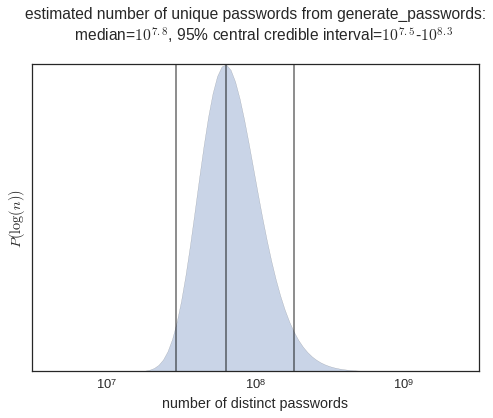

In [23]:
n_s = 10**np.linspace(6.5, 9.5, 100)

plot_posterior(n_s, aggregate)

### Application: XKCD password

One of the other built-in password generating methods is `xkcd_password` which generates passwords simply by selecting 4 words at random from a list of simple english words as recommended by this comic:

![xkcd.com/936](https://imgs.xkcd.com/comics/password_strength.png)

This password generating object is simply built from the random word generator `passwords.constructor.Words`. In this case, since the scheme is so simple, we can much more easily calculate the number of passwords that can be generated from this method, and hence can serve as a bench-mark in validating the statistical method that we have derived for estimating the number of passwords.

Here we will import the method:

In [24]:
from passwords import xkcd_password

And here are some example passwords generated by this method:

In [25]:
for i in range(10):
    print(xkcd_password())

coat letter cart toe
dependent button moon cold
song station there thread
leather weather stop canvas
tray produce mouth rain
print soft bird hat
society hope muscle whistle
wise woman question flower
mountain thing liquid government
poison I breath fork


This method can generate many more passwords than the previous method, and can generate them much more quickly (because the process of loading a text into memory, parsing it, and then selecting a random phrase, which is required for the `generate_password` method is fairly computationally intensive).

Here, we generate a million passwords, examine the resulting number of password collisions, and then estimate the number of passwords that can be generated by this method.

In [51]:
N = 1000000

t0 = time()

passwords = pd.DataFrame(
    [(xkcd_password(),) 
      for i in range(N)],
    columns=["password"]
)

T = time() - t0
print("%d passwords generated in %.2f min" % (N, T/60,))

distribution = passwords.password.value_counts()

1000000 passwords generated in 0.07 min


After a million passwords, very few have collided:

In [52]:
distribution.value_counts()

1    999998
2         1
Name: password, dtype: int64

Here is the posterior probability distribution for the number of passwords that can be generated. The more transparent gray vertical lines show the central 95% confidence interval and the median, and the opaque black vertical line denotes the exact number of passwords that can be generated, which is `850**4` since we are selecting words from a relatively short list of simple english words, and are selecting a sequence of 4 of them. By coincidence, the exact number appears to have fallen in the 95% confidence interval and very close to the median. This closeness is a coincidence, but the agreement between the two is promising.

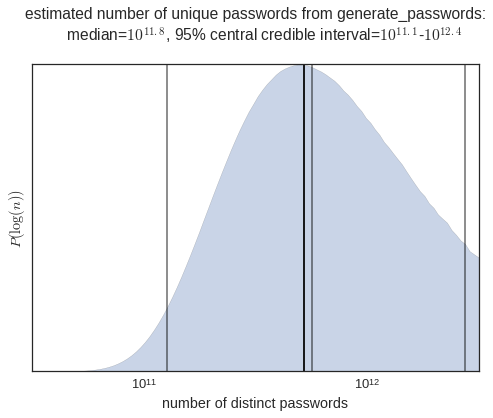

In [53]:
n_s = 10**np.linspace(10.5, 12.5, 100)

plot_posterior(n_s, distribution)

plt.vlines(850**4,0,1)

As suggested by the XKCD comic the default methods have the following entropy:

|method|number of passwords|entropy|
|-|-|-|
|`generate_password`| $10^{7.5}-10^{8.3}$| 25-28 bits |
|`xkcd_password`| $10^{11.7}$| 39 bits |